In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [74]:
data = pd.read_csv("Iris.csv")

x1 = data.iloc[:,1].values
y1 = data.iloc[:,2].values

df = pd.DataFrame({'x': x1,'y': y1})
print(df)

       x    y
0    5.1  3.5
1    4.9  3.0
2    4.7  3.2
3    4.6  3.1
4    5.0  3.6
..   ...  ...
145  6.7  3.0
146  6.3  2.5
147  6.5  3.0
148  6.2  3.4
149  5.9  3.0

[150 rows x 2 columns]


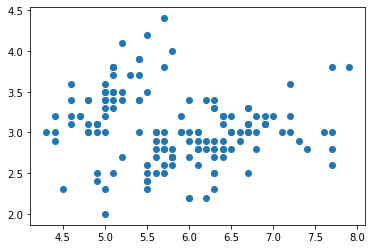

In [75]:
plt.scatter(df['x'],df['y'])

In [77]:
#finding optimal k with elbow method.
def elbow(a):
    Error =[]


    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i).fit(a)
        Error.append(kmeans.inertia_)

    print(Error)
    plt.plot(range(1, 11), Error)
    plt.title('Elbow method')
    plt.xlabel('No of clusters')
    plt.ylabel('Error')
    plt.show()

[130.18093333333334, 57.982406042078765, 37.12370212765957, 27.982542817358613, 20.97661980044561, 17.244448595848596, 14.726624558040001, 12.875402521455154, 11.161008019758023, 9.680400432900434]


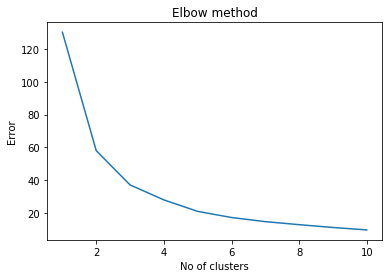

In [78]:
elbow(df)

In [79]:
def cen():
    np.random.seed(100)
    k = 3

    centroids = {
        i+1: [np.random.randint(4, 8), np.random.randint(2, 5)]
        for i in range(k)
    }
    return centroids

In [80]:
centroids=cen()
print(centroids)

{1: [4, 2], 2: [7, 2], 3: [6, 4]}


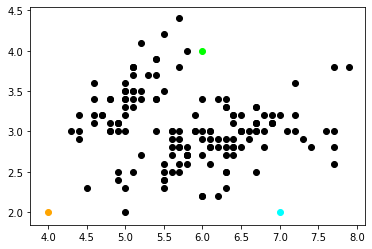

In [81]:
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'orange', 2: 'cyan', 3: 'lime'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    

plt.show()

#Points considered as centroids at the beginning

In [82]:
def assignment(a, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        a['distance_from_{}'.format(i)] = (
            np.sqrt(
                (a['x'] - centroids[i][0]) ** 2
                + (a['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    a['closest'] = a.loc[:, centroid_distance_cols].idxmin(axis=1)
    a['closest'] = a['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    a['color'] = a['closest'].map(lambda x: colmap[x])
    return a

     x    y  distance_from_1  distance_from_2  distance_from_3  closest  \
0  5.1  3.5         1.860108         2.420744         1.029563        3   
1  4.9  3.0         1.345362         2.325941         1.486607        1   
2  4.7  3.2         1.389244         2.594224         1.526434        1   
3  4.6  3.1         1.252996         2.640076         1.664332        1   
4  5.0  3.6         1.886796         2.561250         1.077033        3   

    color  
0    lime  
1  orange  
2  orange  
3  orange  
4    lime  


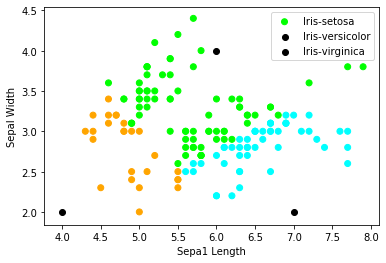

In [83]:
species_list = list(data["Species"].unique())

df = assignment(df, centroids)
print(df.head())

plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(*centroids[i], color='k')
    
plt.legend(species_list)
plt.xlabel('Sepa1 Length')
plt.ylabel('Sepal Width')
plt.show()

#first clustering resullt

In [84]:
import copy

old_centroids = copy.deepcopy(centroids)

In [85]:
#updating centroids

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

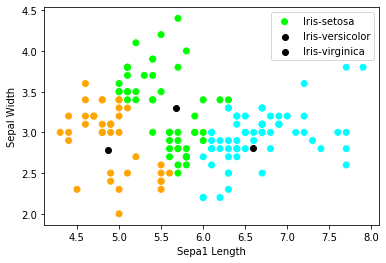

In [86]:
centroids = update(centroids)

df = assignment(df, centroids)

# Plot results
plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(*centroids[i], color='k')

plt.legend(species_list)
plt.xlabel('Sepa1 Length')
plt.ylabel('Sepal Width')
plt.show()

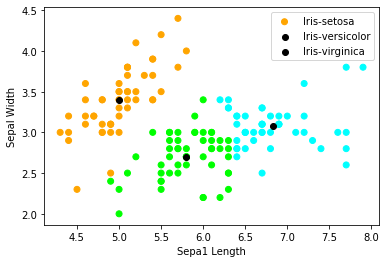

{1: [5.003921568627451, 3.400000000000001], 2: [6.823913043478258, 3.0782608695652165], 3: [5.800000000000001, 2.6999999999999997]}


In [87]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(*centroids[i], color='k')


plt.legend(species_list)
plt.xlabel('Sepa1 Length')
plt.ylabel('Sepal Width')
plt.show()

print(centroids)